In [29]:
import pandas as pd
import miceforest as mf
import numpy as np

In [30]:
df_ori = pd.read_csv("../datasets/train.csv")

In [31]:
# label drop
target = 'DC201'

df_ori = df_ori.drop('id', axis=1)
df_ori = df_ori.dropna(subset=target)

In [32]:
NUMERICAL_DATA = ['DC216', 'DC220', 'DC142a']
CATEGORICAL_DATA = [column for column in df_ori.columns if column != target and column not in NUMERICAL_DATA]

COLUMN_CATEGORICAL_INDEX = []

for column in CATEGORICAL_DATA:
    COLUMN_CATEGORICAL_INDEX.append(df_ori.columns.get_loc(column))

In [33]:
numerical_df = df_ori[NUMERICAL_DATA].copy()
categorical_df = df_ori[CATEGORICAL_DATA].astype('category').copy()
target_df = df_ori[target].replace({'Layak Minum':1, 'Tidak Layak Minum':0})

df_ori = pd.concat([numerical_df, categorical_df, target_df], axis=1)
df_ori

,DC216,DC220,DC142a,DC024,DC025,DC205,DC206,DC207,DC208,DC209,...,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC201
0,1.0,80.0,60.0,11,2,16.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,1
1,2.0,44.0,70.0,11,2,31.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,1
2,2.0,35.0,75.0,11,2,12.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,1
3,3.0,79.0,85.0,11,2,12.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,NaN,1.0,0.0,1.0,1,11.0,1
4,2.0,37.0,65.0,11,2,12.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35968,1.0,21.0,9.0,94,1,17.0,1.0,0.0,0.0,0.0,...,0.0,0.0,3.0,NaN,0.0,0.0,0.0,1,21.0,1
35969,1.0,41.0,12.0,94,1,12.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,1
35970,2.0,52.0,48.0,94,1,12.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1,11.0,1
35971,2.0,58.0,39.0,94,1,12.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,1


In [34]:
# Create kernels.  # Mice Forest
kernel = mf.ImputationKernel(
  data=df_ori,
  save_all_iterations=True,
  categorical_feature='auto',
  random_state=1343
)

kernel.mice(13,verbose=True)

completed_dataset_mf = kernel.complete_data(dataset=0, inplace=False)

e:\Projects\comp-gammafest\venv\Lib\site-packages\miceforest\ImputationKernel.py:371: UserWarning: [DC205,DC213,DC214,DC215,DC217,DC226,DC237,DC237a,DC237b,DC237c,DC237d,DC237e,DC237f,DC241,DC109] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(


Initialized logger with name mice 1-13
Dataset 0
1  | DC220 | DC244 | DC226 | DC246 | DC214 | DC205 | DC109 | DC230a | DC208 | DC215 | DC252 | DC209 | DC237 | DC206 | DC212 | DC211 | DC237f | DC237e | DC237d | DC237c | DC237b | DC237a | DC216 | DC210 | DC207 | DC142a | DC213 | DC241 | DC230b | DC232b | DC232 | DC242 | DC235
2  | DC220 | DC244 | DC226 | DC246 | DC214 | DC205 | DC109 | DC230a | DC208 | DC215 | DC252 | DC209 | DC237 | DC206 | DC212 | DC211 | DC237f | DC237e | DC237d | DC237c | DC237b | DC237a | DC216 | DC210 | DC207 | DC142a | DC213 | DC241 | DC230b | DC232b | DC232 | DC242 | DC235
3  | DC220 | DC244 | DC226 | DC246 | DC214 | DC205 | DC109 | DC230a | DC208 | DC215 | DC252 | DC209 | DC237 | DC206 | DC212 | DC211 | DC237f | DC237e | DC237d | DC237c | DC237b | DC237a | DC216 | DC210 | DC207 | DC142a | DC213 | DC241 | DC230b | DC232b | DC232 | DC242 | DC235
4  | DC220 | DC244 | DC226 | DC246 | DC214 | DC205 | DC109 | DC230a | DC208 | DC215 | DC252 | DC209 | DC237 | DC206 | DC

In [35]:
def drop_outliers(data: pd.DataFrame, column: str):
  # Calculate the quartiles
  Q1 = np.percentile(data[column], 25)
  Q3 = np.percentile(data[column], 75)

  # Calculate the interquartile range
  IQR = Q3 - Q1

  # Calculate the whisker values
  lower_whisker = Q1 - 1.5 * IQR
  upper_whisker = Q3 + 1.5 * IQR

  # Count the number of outliers
  n_outliers = np.sum((data[column] < lower_whisker) | (data[column] > upper_whisker))
  print('num of outliers:', n_outliers)

  data_no_outlier = data[(data[column] >= lower_whisker) & (data[column] <= upper_whisker)]
  
  return data_no_outlier

In [36]:
completed_dataset_mf[NUMERICAL_DATA].describe()

,DC216,DC220,DC142a
count,35970.000000,35970.000000,35970.000000
mean,2.324076,48.477092,82.670976
std,1.105606,13.714380,91.150262
min,0.000000,13.000000,0.000000
25%,2.000000,38.000000,42.000000
50%,2.000000,48.000000,63.000000
75%,3.000000,58.000000,96.000000
max,20.000000,98.000000,998.000000


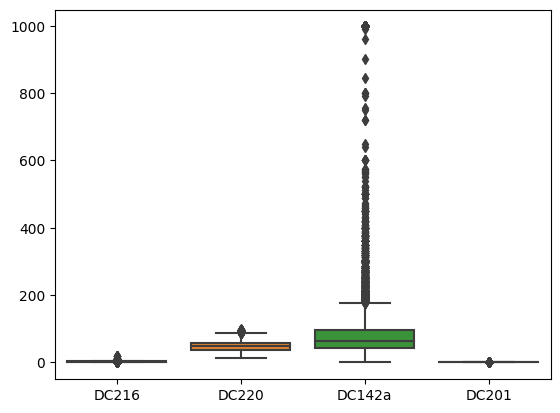

In [37]:
import seaborn as sns

ax = sns.boxplot(completed_dataset_mf)
# ax.set_ylim([0, 200])

In [38]:
completed_drop_outliers = completed_dataset_mf.copy()

for column in NUMERICAL_DATA:
  completed_drop_outliers = drop_outliers(completed_drop_outliers, column)

num of outliers: 1336
num of outliers: 199
num of outliers: 1804


In [39]:
completed_drop_outliers[NUMERICAL_DATA].describe()

,DC216,DC220,DC142a
count,32631.000000,32631.000000,32631.000000
mean,2.198952,47.900432,66.557874
std,0.880726,13.389895,33.930870
min,1.000000,13.000000,0.000000
25%,2.000000,38.000000,42.000000
50%,2.000000,47.000000,60.000000
75%,3.000000,57.000000,87.000000
max,4.000000,85.000000,169.000000


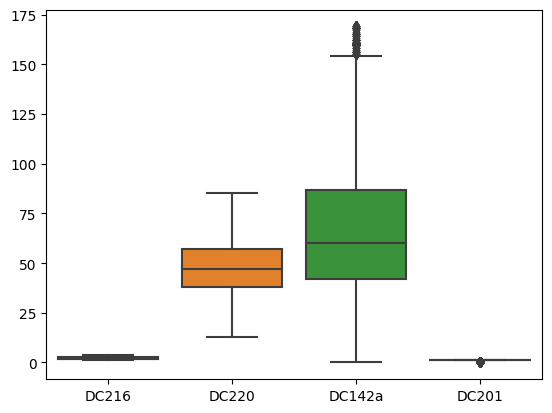

In [40]:
ax = sns.boxplot(completed_drop_outliers)

In [41]:
len(completed_drop_outliers)

32631

In [42]:
completed_drop_outliers.to_csv('imputed_mf13iter_drop_outliers.csv', index=False)